In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

In [3]:
PCANet = pd.read_csv("data/PCA_Adv.csv", header = None).to_numpy()
DeepONet = pd.read_csv("data/DeepONet_Adv.csv", header = None).to_numpy()
Para = pd.read_csv("data/PARA_Adv.csv", header = None).to_numpy()
FNO = pd.read_csv("data/FNO_Adv.csv", header = None).to_numpy()

In [4]:

# 0-> ndata points
# 1-> complexity
# 2-> complexity (flops)
# 3-> train acc
# 4-> test acc


In [6]:
Inputs = np.load('data/Advection_inputs.npy')
Outputs = np.load('data/Advection_outputs.npy')

In [7]:
plt.style.use('plot_style.txt')


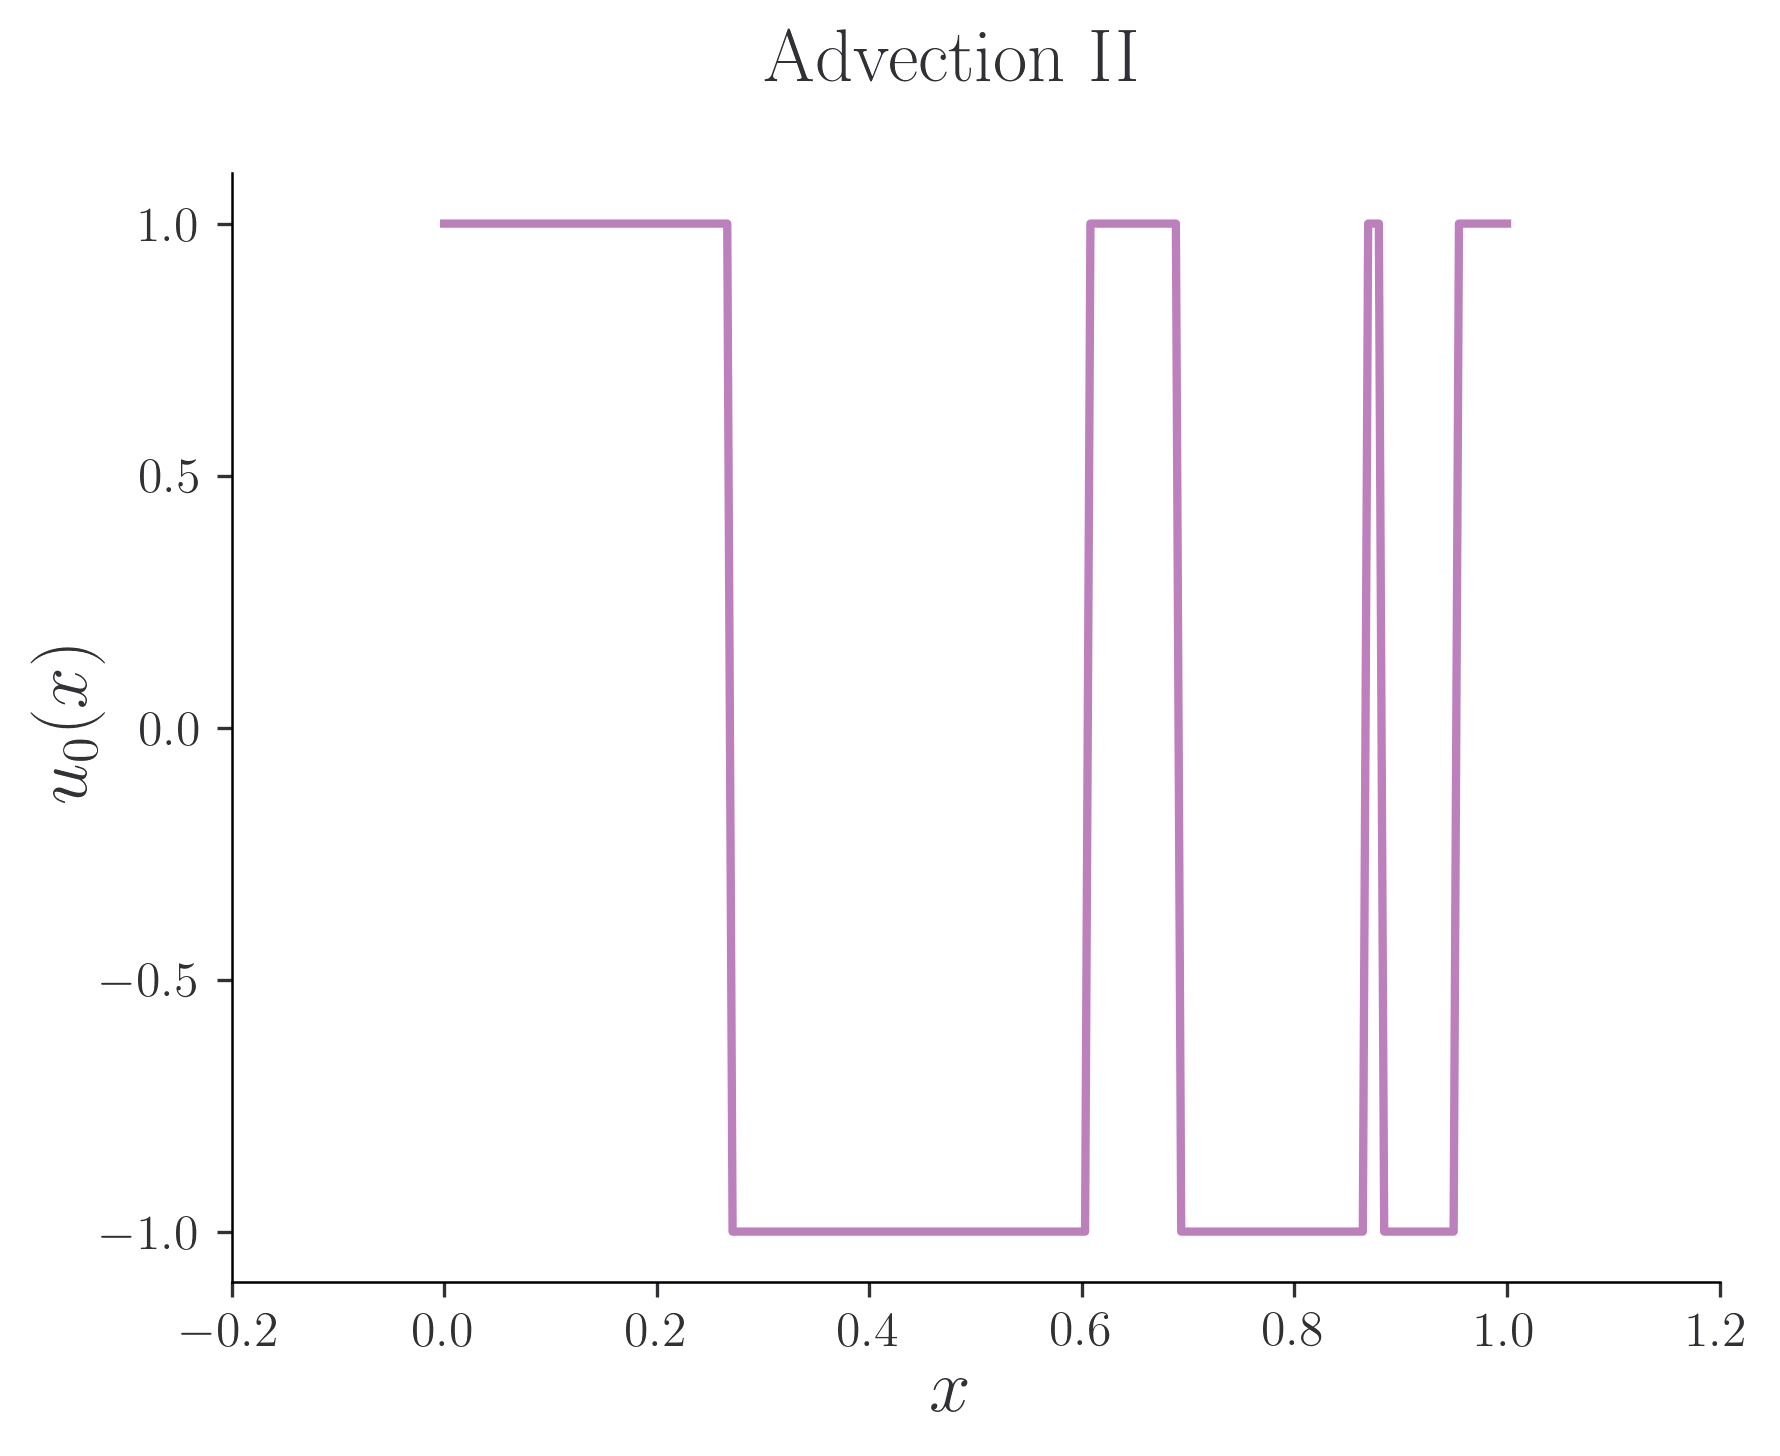

In [23]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
fig.supxlabel(r'$x$')
fig.supylabel(r'$u_0(x)$')
fig.suptitle(r'Advection II')
plt.ylim(-1.1, 1.1)
ax.plot(np.linspace(0,1,200), Inputs[:,3])

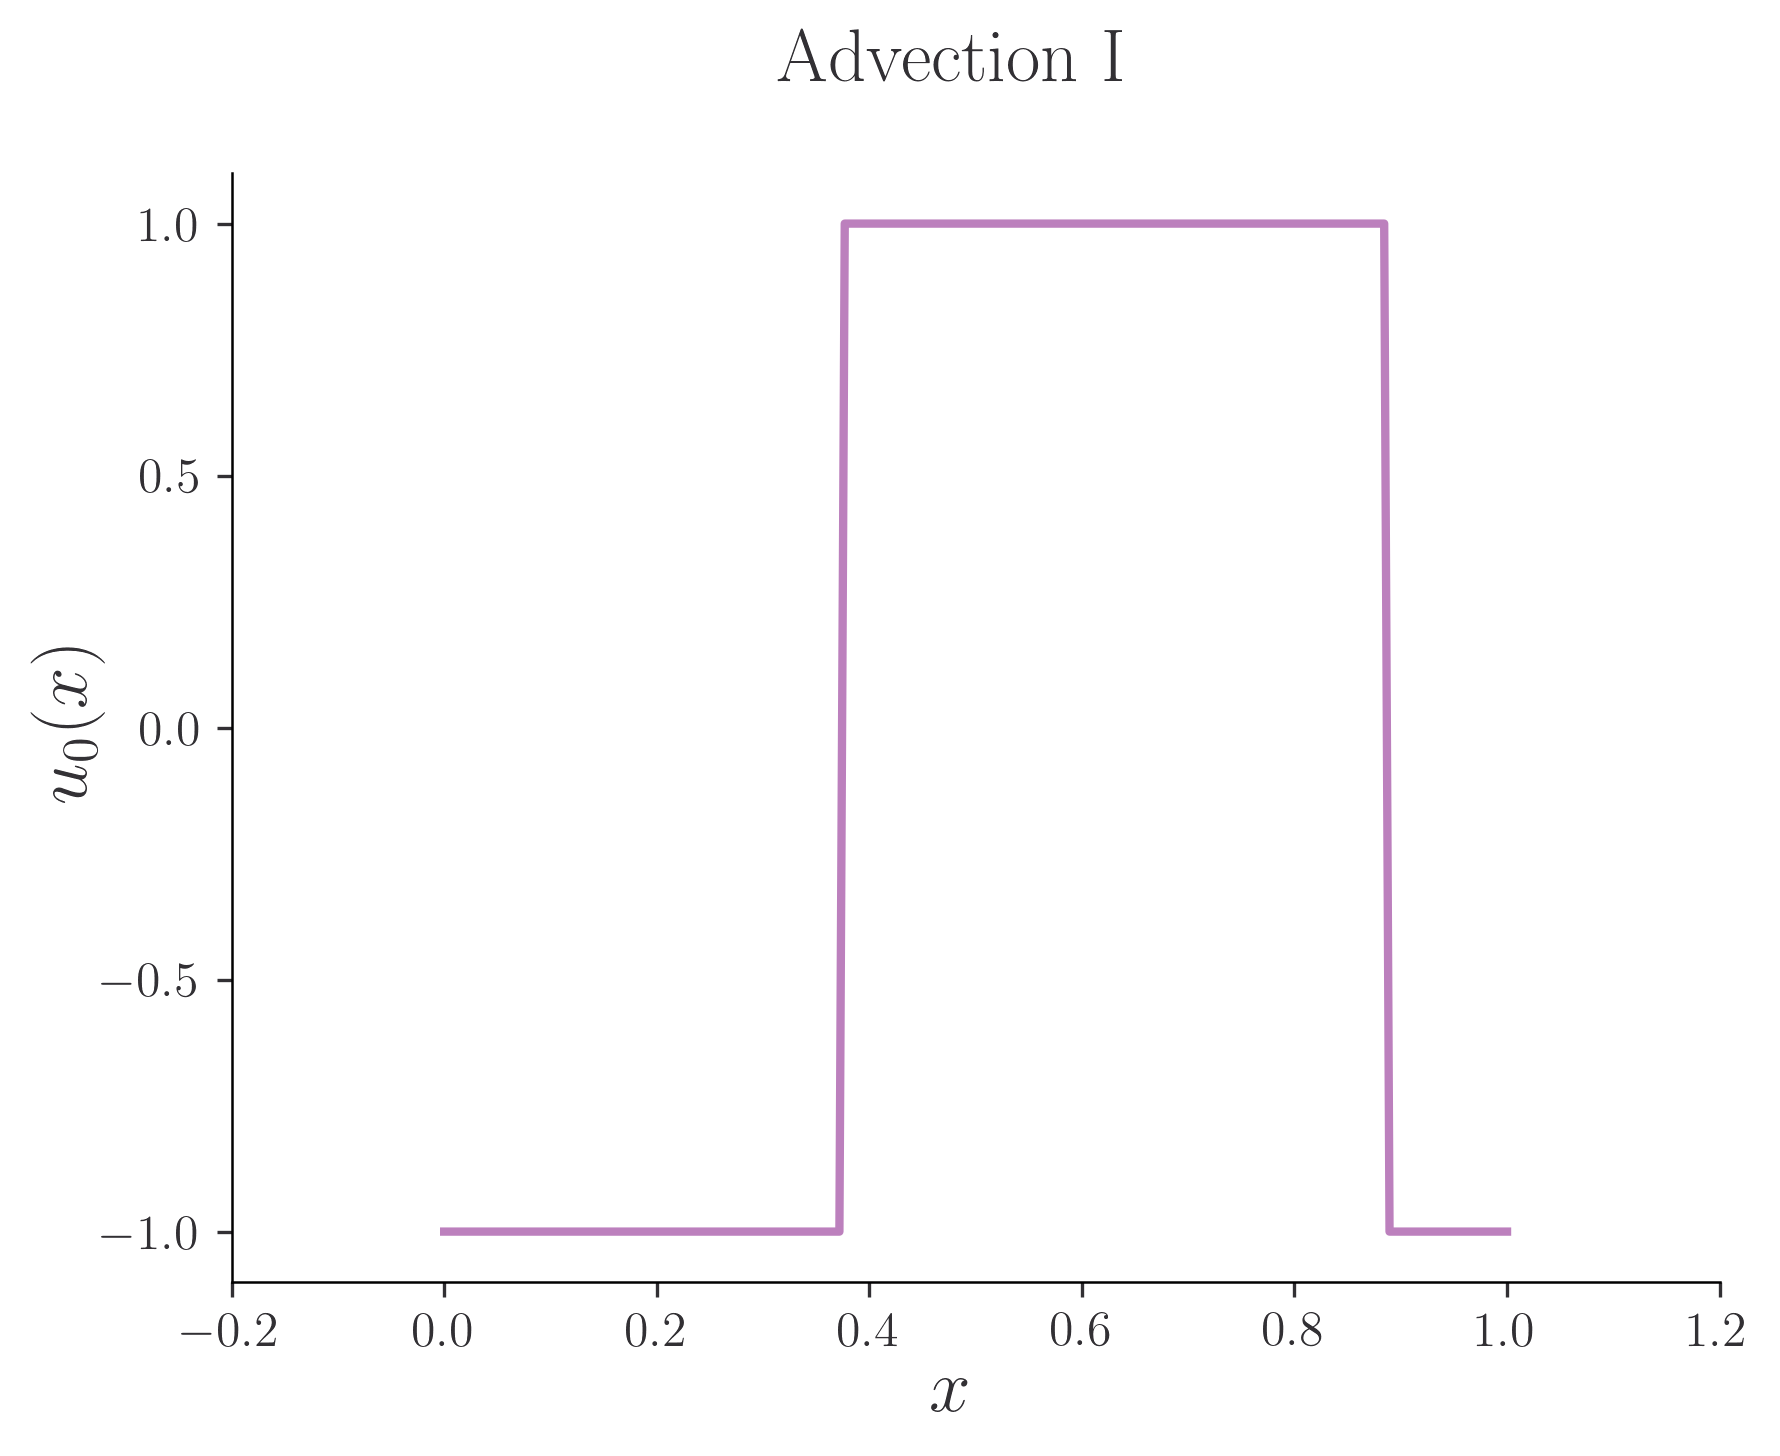

In [22]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
fig.supxlabel(r'$x$')
fig.supylabel(r'$u_0(x)$')
fig.suptitle(r'Advection I')
plt.ylim(-1.1, 1.1)
ax.plot(np.linspace(0,1,200), Inputs[:,6])

In [12]:
Inputs.shape

(200, 40000)

In [13]:
#Inputs = Inputs.transpose((2,1,0))
#Outputs = Outputs.transpose((2,1,0))
#Inputs_fl = Inputs.reshape(len(Inputs), 64*64)
#Outputs_fl = Outputs.reshape(len(Outputs), 64*64)

Linear regression

In [24]:
Inputs = np.load('data/NavierStokes_inputs.npy')

In [28]:
Inputs.shape

(64, 64, 40000)

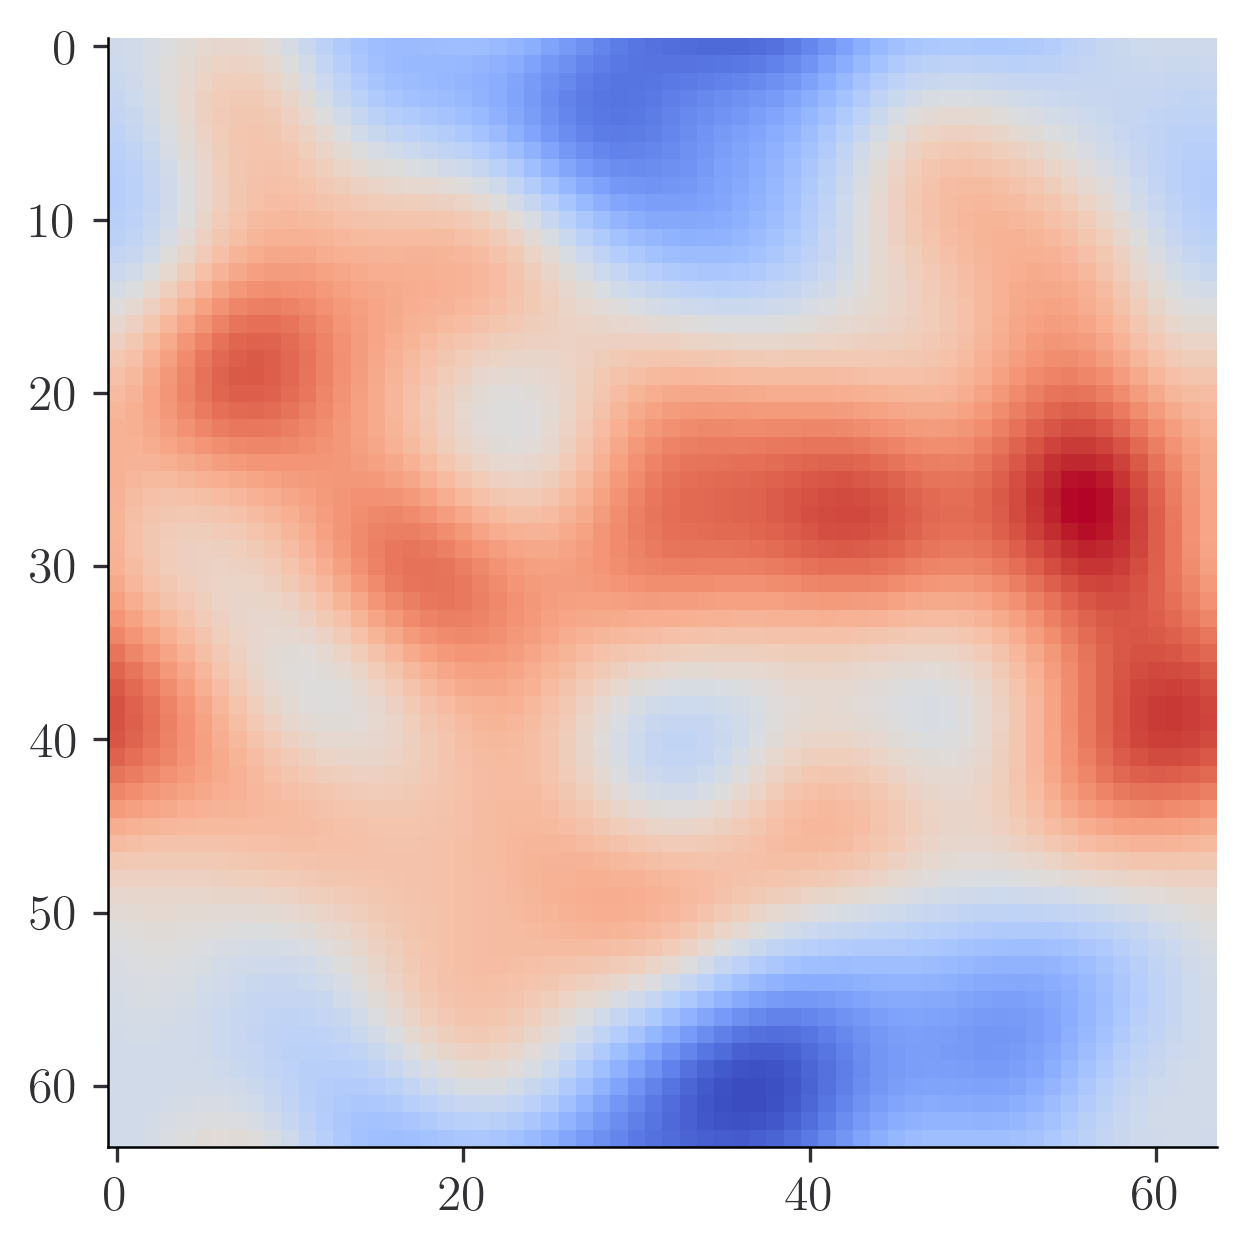

In [34]:
plt.imshow(Inputs[:, :, 0], cmap = 'coolwarm')

In [14]:
Inputs.shape

(200, 40000)

In [15]:
results = []
for Ntrain in [156, 312, 624, 1250, 2500, 5000, 10000, 20000]:
    #for N_components in [16, 32, 64, 128]:
    print(Ntrain)
    Ytr = Outputs.T[:Ntrain]
    Xtr = Inputs.T[:Ntrain]
    #pca = PCA(n_components=min(N_components,Ntrain))
    #Xtr = pca.fit_transform(Xtr)
    reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
    #Ypred Ypredtr = reg.predict(Xtr)
    Ypredtr = reg.predict(Xtr)
    train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
    Xtest = Inputs.T[20000:]
    Ytest = Outputs.T[20000:]
    #Xtest = pca.transform(Xtest)
    Ypred = reg.predict(Xtest)
    test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
    print(train_error, test_error)
    results.append([Ntrain, train_error, test_error])

results = np.array(results)

156
2.6428797351765085e-15 0.2596262500806017
312
0.06394273748234297 0.19006712424244485
624
0.09096264524560005 0.13625870379813623
1250
0.10584907106601693 0.12624053450347664
2500
0.10707592456475563 0.1170205989916106
5000
0.10984403791531903 0.1147159589237508
10000
0.11097470182484376 0.11341780249970755
20000
0.1114933139556525 0.11279756520050732


Text(0, 0.5, 'Test accuracy')

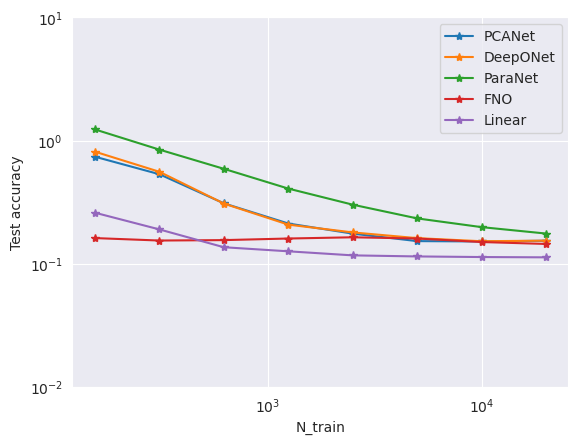

In [16]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 4], '-*', label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 4],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 4],'-*', label = 'FNO')
plt.plot(results[:,0], results[:, 2],'-*', label = 'Linear')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.yticks([1e1,1e0, 1e-1, 1e-2])

plt.xlabel('N_train')
plt.ylabel('Test accuracy')

In [26]:
PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4]

(array([  156.,   312.,   625.,  1250.,  2500.,  5000., 10000., 20000.]),
 array([0.73936883, 0.53300693, 0.30930198, 0.21220755, 0.17563196,
        0.15274085, 0.15176696, 0.15384963]))

In [24]:
FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 4]

(array([  156.,   312.,   625.,  1250.,  2500.,  5000., 10000., 20000.]),
 array([0.16165934, 0.15440683, 0.15564714, 0.16034921, 0.16408271,
        0.16036483, 0.15017393, 0.14486427]))

In [25]:
Para[Para[:,1] == 512][:, 4]

array([1.23107236, 0.84448433, 0.58958716, 0.40761958, 0.30180196,
       0.23355607, 0.19839668, 0.17596033])

In [23]:
DeepONet[DeepONet[:,1] == 512][:,4]

array([0.81209806, 0.55799742, 0.30799015, 0.20782632, 0.17971471,
       0.16149004, 0.15240744, 0.15409488])

### [new!] Cost-accuracy plot!

In [17]:
m = 200
n = 200

def cplx(p):
    return min(2*m*n, (2*p-1)*n + (2*m-1)*p + m)

In [18]:
resultspca = []
for Ntrain in [10000]:
    for N_components in [16, 32, 64, 128, 200]:
        print(Ntrain)
        Ytr = Outputs.T[:Ntrain]
        Xtr = Inputs.T[:Ntrain]
        pca = PCA(n_components=min(N_components,Ntrain))
        Xtr = pca.fit_transform(Xtr)
        reg = LinearRegression(n_jobs = -1).fit(Xtr, Ytr)
        #Ypred Ypredtr = reg.predict(Xtr)
        Ypredtr = reg.predict(Xtr)
        train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
        Xtest = Inputs.T[20000:]
        Ytest = Outputs.T[20000:]
        Xtest = pca.transform(Xtest)
        Ypred = reg.predict(Xtest)
        test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
        print(N_components, train_error, test_error)
        resultspca.append([N_components, test_error])
#results = np.array(results)

10000
16 0.25358131110922666 0.2539750558073611
10000
32 0.18210464564024315 0.18283896775861255
10000
64 0.13613380289523178 0.1371020695289114
10000
128 0.11443987558576207 0.11594513618759306
10000
200 0.11096031326778405 0.11341718064240679


In [19]:
resultspca

[[16, 0.2539750558073611],
 [32, 0.18283896775861255],
 [64, 0.1371020695289114],
 [128, 0.11594513618759306],
 [200, 0.11341718064240679]]

Text(0.0, 1.0, 'Accuracy complexity tradeoff advection equation')

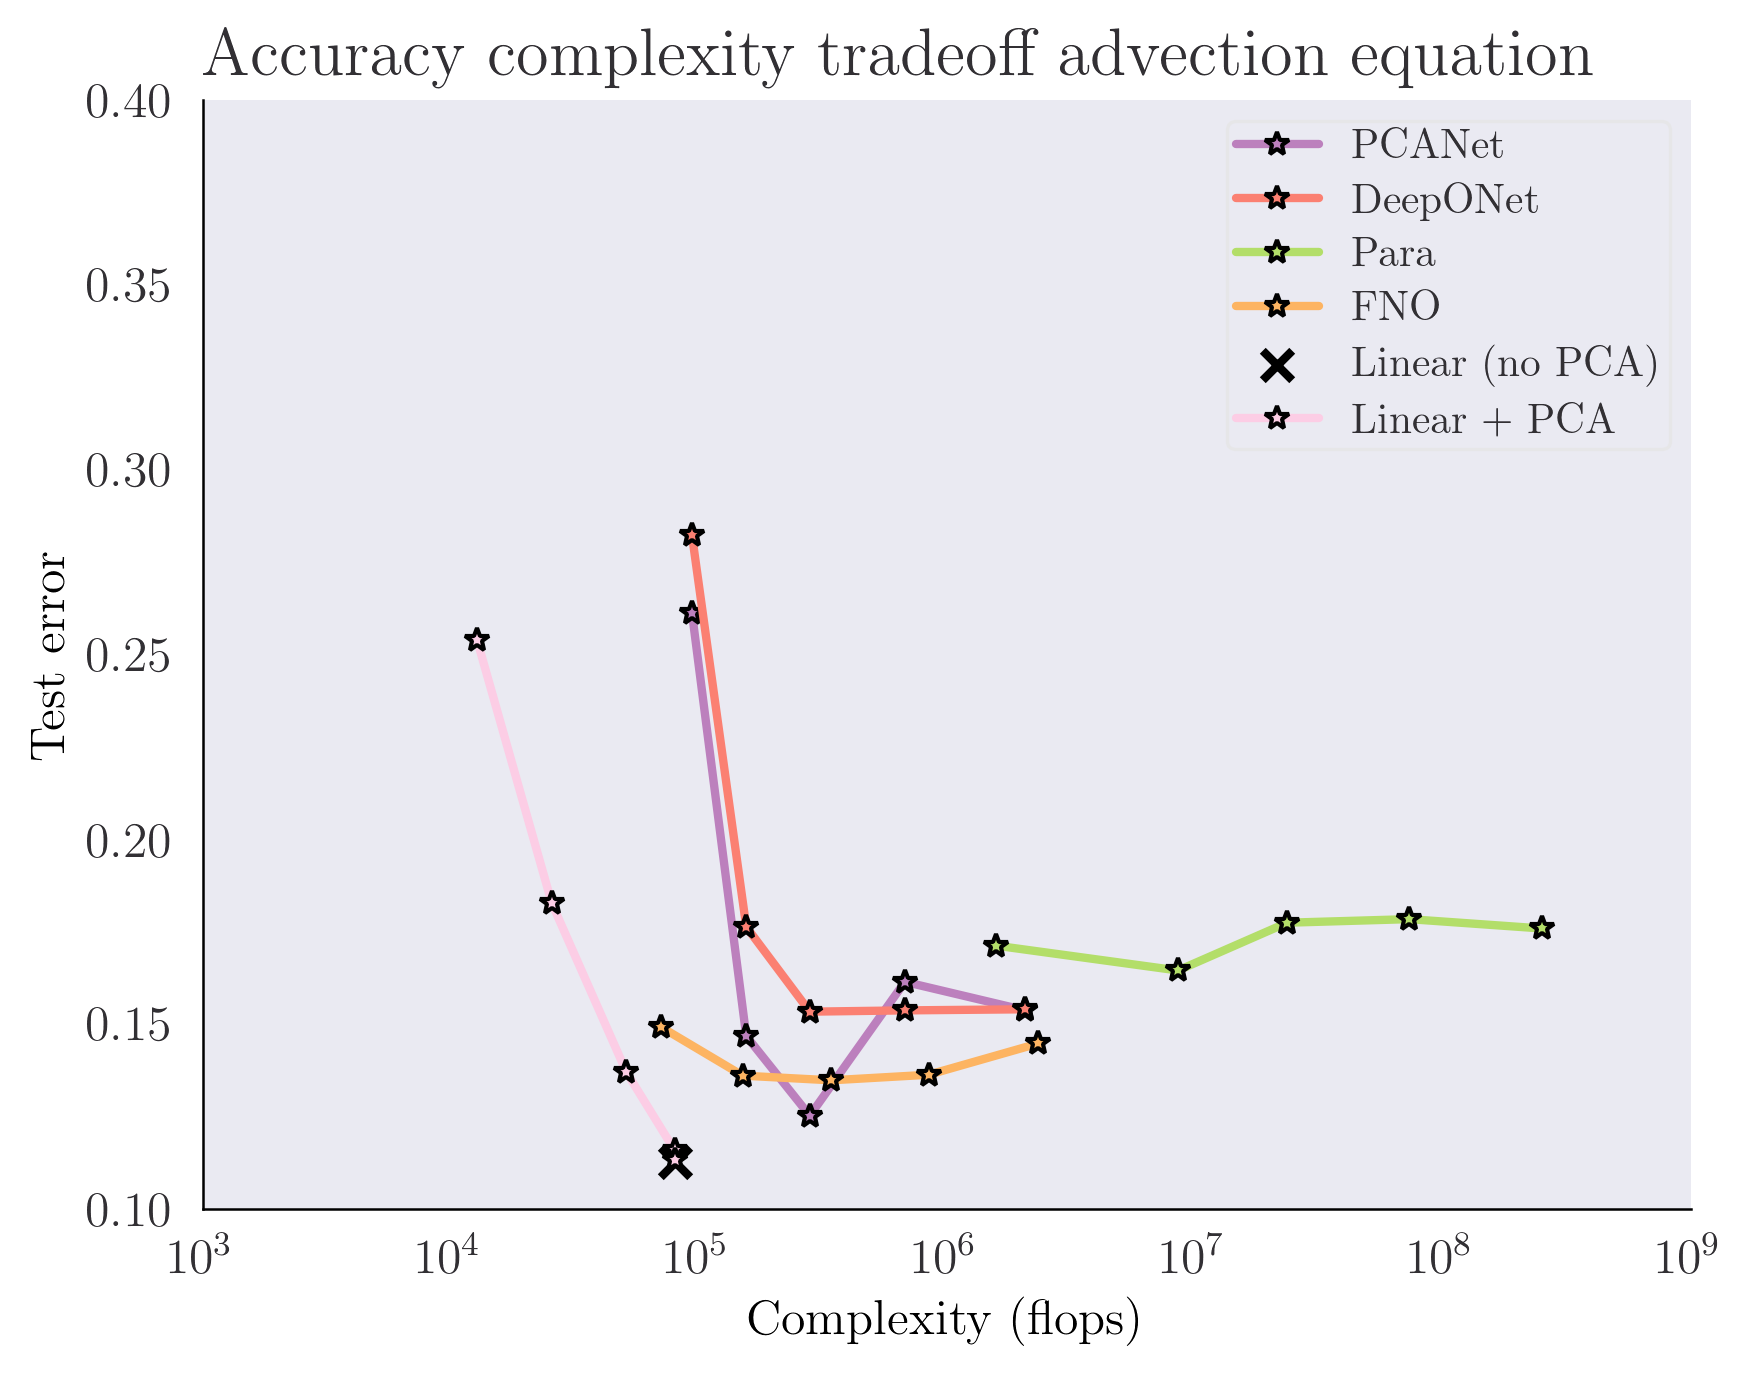

In [20]:
plt.style.use('plot_style.txt')
plt.xlabel(r'Complexity (flops)')
plt.ylabel(r'Test error')
plt.plot(PCANet[PCANet[:,0] == 20000][:,2], PCANet[PCANet[:,0] == 20000][:, 4], '-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,0] == 20000][:,2], DeepONet[DeepONet[:,0] == 20000][:, 4], '-*', label = 'DeepONet')
plt.plot(Para[Para[:,0] == 20000][:,2], Para[Para[:,0] == 20000][:, 4], '-*', label = 'Para')
plt.plot(FNO[FNO[:,0] == 20000][:,2], FNO[FNO[:,0] == 20000][:, 4], '-*', label = 'FNO')
plt.scatter([2*m*n], [results[:, 2][-1]], marker = 'x', s = 50, color = 'black', label = 'Linear (no PCA)')
plt.plot([cplx(i) for i in [j[0] for j in resultspca]], [i[1] for i in resultspca], '-*', label = 'Linear + PCA')
plt.ylim(0.1, 0.4)
plt.legend()
plt.xscale('log')
plt.title('Accuracy complexity tradeoff advection equation')
#plt.yscale('log')


# GP Regression and beyond: I moved to JAX in another notebook

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

In [22]:
kernel = RationalQuadratic()

In [23]:
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 


In [24]:
pca = PCA(n_components=100)

In [25]:
resultsgp = []
for Ntrain in [156, 312, 624, 1250, 2500]:
    print(Ntrain)
    Ytr = Outputs.T[:Ntrain]
    Xtr = Inputs.T[:Ntrain]
    #pca = PCA(n_components=128)
    #Xtr = pca.fit_transform(Xtr)
    
    model = GaussianProcessRegressor(kernel, alpha = 1e-10)
    model.fit(Xtr, Ytr)
    #Ypred Ypredtr = reg.predict(Xtr)
    Ypredtr = model.predict(Xtr)
    train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
    Xtest = Inputs.T[20000:]
    Ytest = Outputs.T[20000:]
    #Xtest = pca.transform(Xtest)
    Ypred= model.predict(Xtest)
    test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
    print(train_error, test_error)
    resultsgp.append([Ntrain, train_error, test_error])

156


/home/pau/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


6.376680383528909e-10 0.19631830396477545
312
0.0009067762070679655 0.20044946144421666
624
0.0017755046068527235 0.17802839218841157
1250
0.004836408277281025 0.1591319361271286
2500


/home/pau/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.0079087277684264 0.2900857783876507


In [27]:
resultsgp = np.array(resultsgp[:-1])

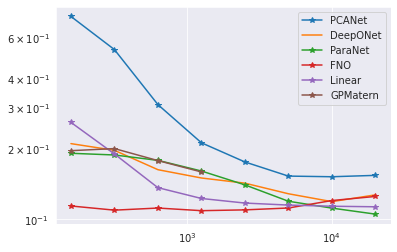

In [28]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3], label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.plot(results[:,0], results[:, 2],'-*', label = 'Linear')
plt.plot(resultsgp[:,0], resultsgp[:, 2],'-*', label = 'GPMatern')

plt.legend()
plt.xscale('log')
plt.yscale('log')


In [33]:
from sklearn import tree

In [55]:
from sklearn.ensemble import RandomForestRegressor


In [56]:
resultstree = []
for Ntrain in [156, 312, 624, 1250, 2500, 5000, 10000, 20000]:
    print(Ntrain)
    Ytr = Outputs.T[:Ntrain]
    Xtr = Inputs.T[:Ntrain]

    model= RandomForestRegressor()

    model = model.fit(Xtr, Ytr)

    Ytr = Outputs.T
    Xtr = Inputs.T
   
    Xtest = Inputs.T[20000:]
    Ytest = Outputs.T[20000:]
    Ypredtr = model.predict(Xtr)
    Ypred = model.predict(Xtest)
    
    train_error = np.mean(np.linalg.norm(Ypredtr-Ytr, axis = 1)/np.linalg.norm(Ytr, axis = 1))
    test_error = np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))

    Ypred = clf.predict(Xtest)
    np.mean(np.linalg.norm(Ypred-Ytest, axis = 1)/np.linalg.norm(Ytest, axis = 1))
    resultstree.append([Ntrain, train_error, test_error])

156
312
624
1250
2500
5000
10000
20000


In [57]:
resultstree = np.array(resultstree)

In [62]:
>>> from sklearn.linear_model import LogisticRegression


In [65]:
from sklearn.neural_network import MLPRegressor

In [60]:
resultstree

array([[1.56000000e+02, 3.46334083e-01, 3.46816278e-01],
       [3.12000000e+02, 3.02353267e-01, 3.03912084e-01],
       [6.24000000e+02, 2.66838175e-01, 2.69355940e-01],
       [1.25000000e+03, 2.34628744e-01, 2.39046900e-01],
       [2.50000000e+03, 2.06945363e-01, 2.14992729e-01],
       [5.00000000e+03, 1.82500146e-01, 1.97333892e-01],
       [1.00000000e+04, 1.58172232e-01, 1.84576537e-01],
       [2.00000000e+04, 1.27750916e-01, 1.72913049e-01]])

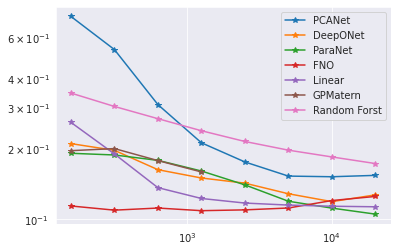

In [59]:
#plt.plot(PCA[PCA[:,1] == 512][:,0], PCA[PCA[:,1] == 512][:, 3])
plt.plot(PCANet[PCANet[:,1] == 512][:,0], PCANet[PCANet[:,1] == 512][:, 4],'-*', label = 'PCANet')
plt.plot(DeepONet[DeepONet[:,1] == 512][:,0], DeepONet[DeepONet[:,1] == 512][:, 3], '-*',label = 'DeepONet')
plt.plot(Para[Para[:,1] == 512][:,0], Para[Para[:,1] == 512][:, 3],'-*', label = 'ParaNet')
plt.plot(FNO[FNO[:,1] == 32][:,0], FNO[FNO[:,1] == 32][:, 3],'-*', label = 'FNO')
plt.plot(results[:,0], results[:, 2],'-*', label = 'Linear')
plt.plot(resultsgp[:,0], resultsgp[:, 2],'-*', label = 'GPMatern')
plt.plot(resultstree[:,0], resultstree[:, 2],'-*', label = 'Random Forst')

plt.legend()
plt.xscale('log')
plt.yscale('log')


In [31]:
Ytr.shape

(2500, 200)

In [30]:
Xtr.shape

(2500, 200)